## Time series Analysis and forecasting of covid-19 in India

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv('C:/Users/anjit/Desktop/New folder/CL/covid_19_india.csv')
population=pd.read_csv('C:/Users/anjit/Desktop/New folder/CL/state_population.csv')
zones=pd.read_csv('C:/Users/anjit/Desktop/New folder/CL/zones.csv')

In [3]:
df.head()

,Sno,Date,Time,State/Union Territory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30-Jan-20,18:00:00,Kerala,1,0,0.0,0.0,1.0
1,2.0,31-Jan-20,18:00:00,Kerala,1,0,0.0,0.0,1.0
2,3.0,01-Feb-20,18:00:00,Kerala,2,0,0.0,0.0,2.0
3,4.0,02-Feb-20,18:00:00,Kerala,3,0,0.0,0.0,3.0
4,5.0,03-Feb-20,18:00:00,Kerala,3,0,0.0,0.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8486 entries, 0 to 8485
Data columns (total 9 columns):
Sno                         8423 non-null float64
Date                        8423 non-null object
Time                        8423 non-null object
State/Union Territory       8423 non-null object
ConfirmedIndianNational     8423 non-null object
ConfirmedForeignNational    8423 non-null object
Cured                       8423 non-null float64
Deaths                      8423 non-null float64
Confirmed                   8423 non-null float64
dtypes: float64(4), object(5)
memory usage: 596.8+ KB


In [5]:
df.tail()

,Sno,Date,Time,State/Union Territory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
8481,8482.0,16-Nov-20,08:00:00,Telengana,-,-,242084.0,1407.0,257876.0
8482,8483.0,16-Nov-20,08:00:00,Tripura,-,-,30555.0,364.0,31962.0
8483,8484.0,16-Nov-20,08:00:00,Uttarakhand,-,-,62543.0,1107.0,68215.0
8484,8485.0,16-Nov-20,08:00:00,Uttar Pradesh,-,-,480965.0,7372.0,511304.0
8485,8486.0,16-Nov-20,08:00:00,West Bengal,-,-,394576.0,7661.0,431551.0


In [6]:
df.shape

(8486, 9)

In [7]:
population.head()

,Sl.no,State/Union Territory,Population
0,1,Uttar Pradesh,237882725.0
1,2,Bihar,124799926.0
2,3,Maharashtra,123144223.0
3,4,West Bengal,99609303.0
4,5,Madhya Pradesh,85358965.0


In [8]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,8423.000000,8.423000e+03,8423.000000,8.423000e+03
mean,4252.327437,6.280601e+04,1269.179152,7.578192e+04
std,2455.807222,1.636980e+05,4199.868468,1.892334e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2109.500000,9.600000e+01,2.000000,3.640000e+02
50%,4275.000000,3.239000e+03,52.000000,4.856000e+03
75%,6380.500000,3.992600e+04,728.500000,5.679550e+04
max,8486.000000,1.615379e+06,45974.000000,1.747242e+06


In [9]:
df.isnull().sum()

Sno                         63
Date                        63
Time                        63
State/Union Territory       63
ConfirmedIndianNational     63
ConfirmedForeignNational    63
Cured                       63
Deaths                      63
Confirmed                   63
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,Sno,Date,Time,State/Union Territory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df=df.dropna()
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/Union Territory       0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [12]:
df.drop(['Sno','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [13]:
df['Current Cases'] = df['Confirmed'] -(df['Cured'] + df['Deaths'])
total_active=df['Current Cases'].sum()

In [14]:


df.head()

,Date,Time,State/Union Territory,Cured,Deaths,Confirmed,Current Cases
0,30-Jan-20,18:00:00,Kerala,0.0,0.0,1.0,1.0
1,31-Jan-20,18:00:00,Kerala,0.0,0.0,1.0,1.0
2,01-Feb-20,18:00:00,Kerala,0.0,0.0,2.0,2.0
3,02-Feb-20,18:00:00,Kerala,0.0,0.0,3.0,3.0
4,03-Feb-20,18:00:00,Kerala,0.0,0.0,3.0,3.0


### Finding total no of confirmed,cured,death for each staes till last date


In [15]:
#Finding total no of confirmed,cured,death for each staes till last date
Tot_Cases = df.groupby('State/Union Territory')['Confirmed','Cured','Deaths','Current Cases','State/Union Territory',].sum().astype(float)
Tot_Cases=pd.DataFrame(Tot_Cases)
Tot_Cases=Tot_Cases.reset_index()
Tot_Cases

,State/Union Territory,Confirmed,Cured,Deaths,Current Cases
0,Andaman and Nicobar Islands,376093.0,327035.0,5017.0,44041.0
1,Andhra Pradesh,64911493.0,56536152.0,555228.0,7820113.0
2,Arunachal Pradesh,941675.0,734104.0,2086.0,205485.0
3,Assam,16820098.0,14137404.0,63130.0,2619564.0
4,Bihar,18536035.0,16487424.0,93293.0,1955318.0
5,Chandigarh,1009607.0,832863.0,14459.0,162285.0
6,Chhattisgarh,10718422.0,8308061.0,105254.0,2305107.0
7,Dadra and Nagar Haveli and Daman and Diu,308286.0,276624.0,250.0,31412.0
8,Delhi,33756114.0,29065906.0,728047.0,3962161.0
9,Goa,3155891.0,2668588.0,39470.0,447833.0


In [16]:
Tot_Cases['Confirmed'].sum()

638311122.0

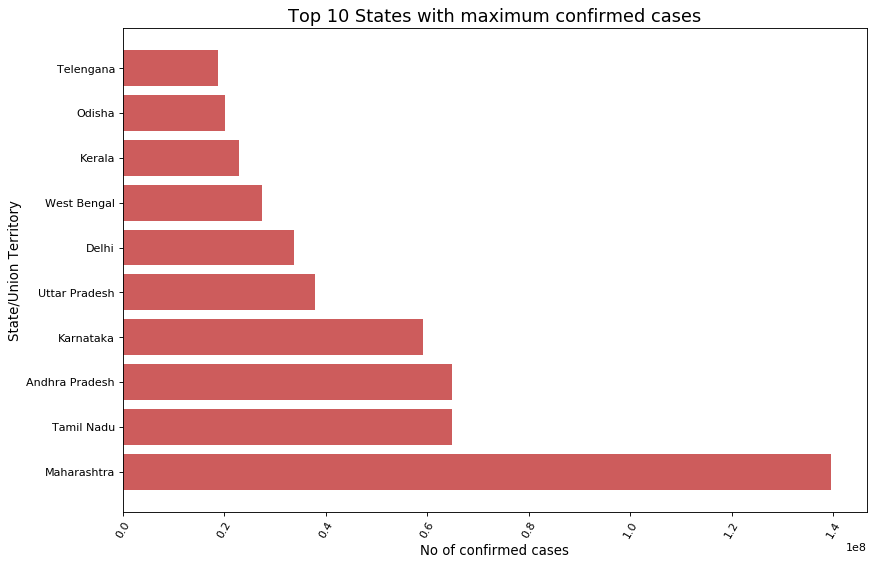

In [17]:
#plotting top 10 sates with maximum covid caeses.state against no of covid cases
covid19_top_10 = Tot_Cases.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.barh(covid19_top_10 ['State/Union Territory'][:10], covid19_top_10 ['Confirmed'][:10],
        align='center',color='indianred')
plt.ylabel('State/Union Territory', size = 12)
plt.xlabel('No of confirmed cases', size = 12)
plt.title('Top 10 States with maximum confirmed cases', size = 16)
plt.xticks(rotation=60,fontsize=10)

plt.show()

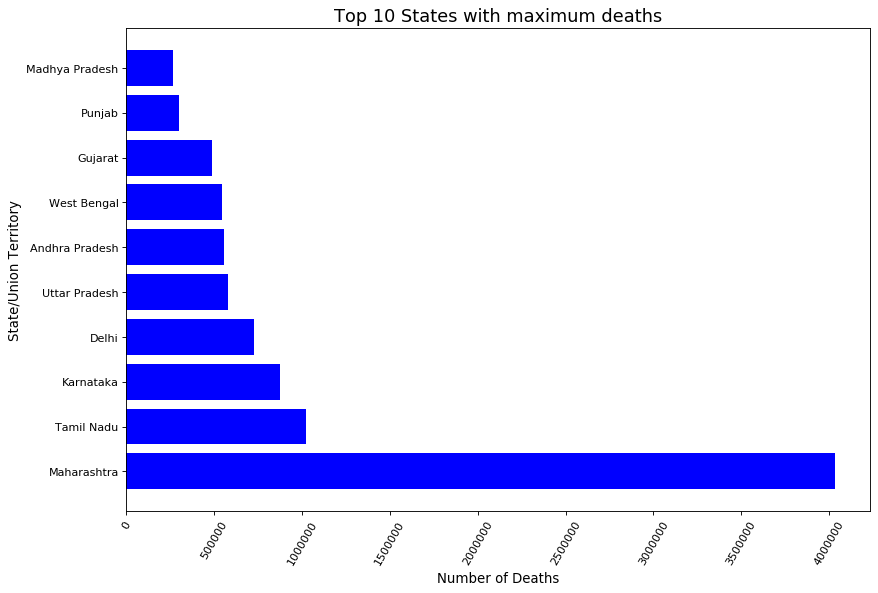

In [18]:
covid19_top_10 = Tot_Cases.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.barh(covid19_top_10 ['State/Union Territory'][:10], covid19_top_10 ['Deaths'][:10],
        align='center',color='blue')
plt.xlabel('Number of Deaths',size=12)
plt.ylabel('State/Union Territory', size = 12)
plt.title('Top 10 States with maximum deaths', size = 16)
plt.xticks(rotation=60,fontsize=10)

plt.show()

In [19]:
Tot_Cases['mortality_rate']=(Tot_Cases['Deaths']/Tot_Cases['Confirmed']).round(2)
Tot_Cases.head()


,State/Union Territory,Confirmed,Cured,Deaths,Current Cases,mortality_rate
0,Andaman and Nicobar Islands,376093.0,327035.0,5017.0,44041.0,0.01
1,Andhra Pradesh,64911493.0,56536152.0,555228.0,7820113.0,0.01
2,Arunachal Pradesh,941675.0,734104.0,2086.0,205485.0,0.00
3,Assam,16820098.0,14137404.0,63130.0,2619564.0,0.00
4,Bihar,18536035.0,16487424.0,93293.0,1955318.0,0.01


In [20]:
states=list(Tot_Cases['State/Union Territory'])
confirmed_cases_statewise=list(Tot_Cases['Confirmed'])
Cured=list(Tot_Cases['Cured'])

In [21]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(states))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c,autopct='%1.1f%%')
    
    plt.legend(x, loc='center left', fontsize=10)
    plt.tight_layout()

    plt.show()

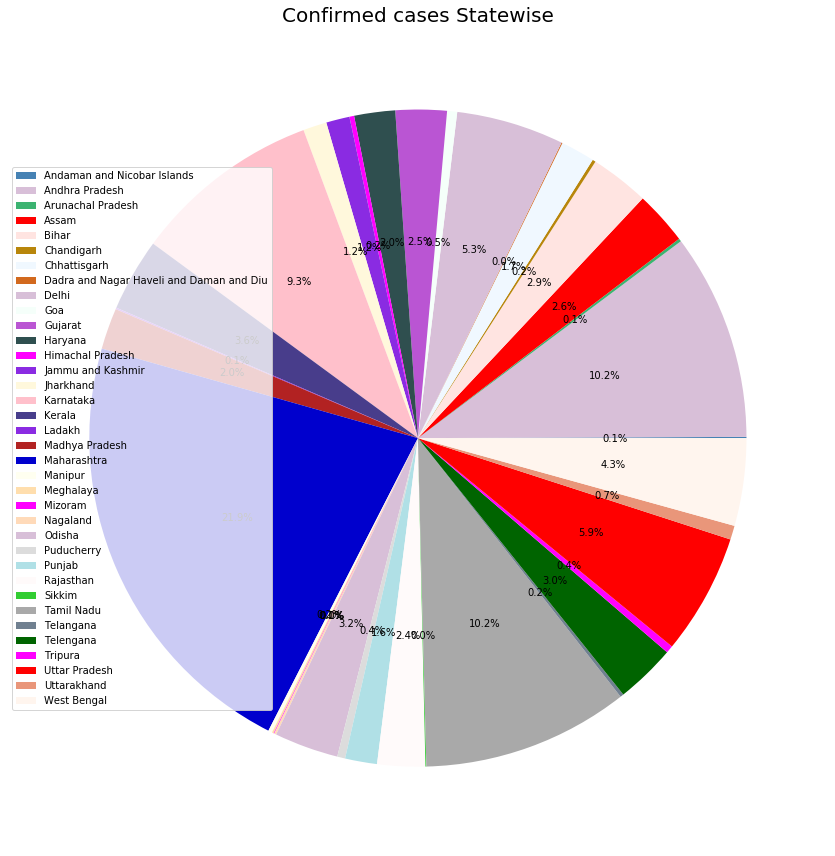

In [22]:
plot_pie_charts(states, confirmed_cases_statewise, 'Confirmed cases Statewise')


In [23]:

df['Date'] = pd.to_datetime(df['Date'])

df['Mon_Year'] = df['Date'].dt.strftime('%b-%Y')
df['Mon_Year'].unique()

array(['Jan-2020', 'Feb-2020', 'Mar-2020', 'Apr-2020', 'May-2020',
       'Jun-2020', 'Jul-2020', 'Aug-2020', 'Sep-2020', 'Oct-2020',
       'Nov-2020'], dtype=object)

In [24]:
df

,Date,Time,State/Union Territory,Cured,Deaths,Confirmed,Current Cases,Mon_Year
0,2020-01-30,18:00:00,Kerala,0.0,0.0,1.0,1.0,Jan-2020
1,2020-01-31,18:00:00,Kerala,0.0,0.0,1.0,1.0,Jan-2020
2,2020-02-01,18:00:00,Kerala,0.0,0.0,2.0,2.0,Feb-2020
3,2020-02-02,18:00:00,Kerala,0.0,0.0,3.0,3.0,Feb-2020
4,2020-02-03,18:00:00,Kerala,0.0,0.0,3.0,3.0,Feb-2020
...,...,...,...,...,...,...,...,...
8481,2020-11-16,08:00:00,Telengana,242084.0,1407.0,257876.0,14385.0,Nov-2020
8482,2020-11-16,08:00:00,Tripura,30555.0,364.0,31962.0,1043.0,Nov-2020
8483,2020-11-16,08:00:00,Uttarakhand,62543.0,1107.0,68215.0,4565.0,Nov-2020
8484,2020-11-16,08:00:00,Uttar Pradesh,480965.0,7372.0,511304.0,22967.0,Nov-2020


In [25]:
ts_df=df.groupby('Mon_Year')['Deaths','Confirmed','Cured','Current Cases'].sum()
ts_df = pd.DataFrame(ts_df)


In [26]:
new_order=['Jan-2020', 'Feb-2020','Mar-2020','Apr-2020','May-2020','Jun-2020','Jul-2020','Aug-2020','Sep-2020','Oct-2020','Nov-2020']
ts_df = ts_df.reindex(new_order, axis=0)
ts_df
 

,Deaths,Confirmed,Cured,Current Cases
Mon_Year,,,,
Jan-2020,0.0,2.0,0.0,2.0
Feb-2020,0.0,86.0,0.0,86.0
Mar-2020,202.0,9603.0,808.0,8593.0
Apr-2020,13270.0,422365.0,75443.0,333652.0
May-2020,89834.0,2900714.0,1133341.0,1677539.0
Jun-2020,319690.0,10317726.0,5668946.0,4329090.0
Jul-2020,793511.0,31659104.0,19980130.0,10885463.0
Aug-2020,1553468.0,80749620.0,58580895.0,20615257.0
Sep-2020,2443374.0,149113758.0,118592934.0,28077450.0


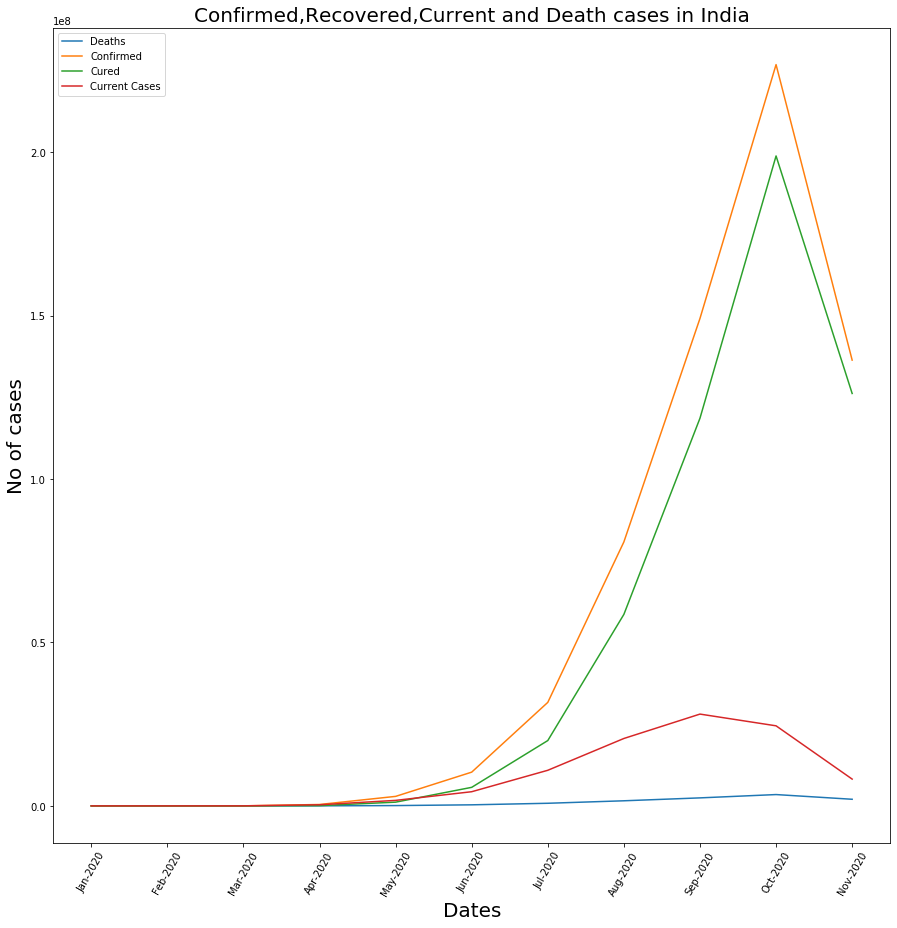

In [27]:
plt.figure(figsize=(15, 15))
plt.plot(ts_df['Deaths'],label='Deaths')
plt.plot(ts_df['Confirmed'],label='Confirmed')
plt.plot(ts_df['Cured'],label='Cured')
plt.plot(ts_df['Current Cases'],label='Current Cases')
plt.xlabel("Dates",fontsize=20)
plt.ylabel("No of cases",fontsize=20)
plt.title("Confirmed,Recovered,Current and Death cases in India",fontsize=20)

plt.xticks(rotation=60,fontsize=10)

plt.legend()

In [28]:
zones.head()

,Sl.no,State/Union Territory,Zones
0,1,Uttar Pradesh,North India
1,2,Bihar,East
2,3,Maharashtra,West India
3,4,West Bengal,East
4,5,Madhya Pradesh,Central India


In [29]:
q=pd.merge(Tot_Cases, zones, on="State/Union Territory")
q.drop(['Sl.no'],axis=1,inplace=True)
q.head()

,State/Union Territory,Confirmed,Cured,Deaths,Current Cases,mortality_rate,Zones
0,Andhra Pradesh,64911493.0,56536152.0,555228.0,7820113.0,0.01,South India
1,Arunachal Pradesh,941675.0,734104.0,2086.0,205485.0,0.00,NorthEast
2,Assam,16820098.0,14137404.0,63130.0,2619564.0,0.00,NorthEast
3,Bihar,18536035.0,16487424.0,93293.0,1955318.0,0.01,East
4,Chandigarh,1009607.0,832863.0,14459.0,162285.0,0.01,North India


In [30]:



zone_grp =q.groupby('Zones')['Confirmed','Cured','Deaths','Current Cases'].sum().astype(float)


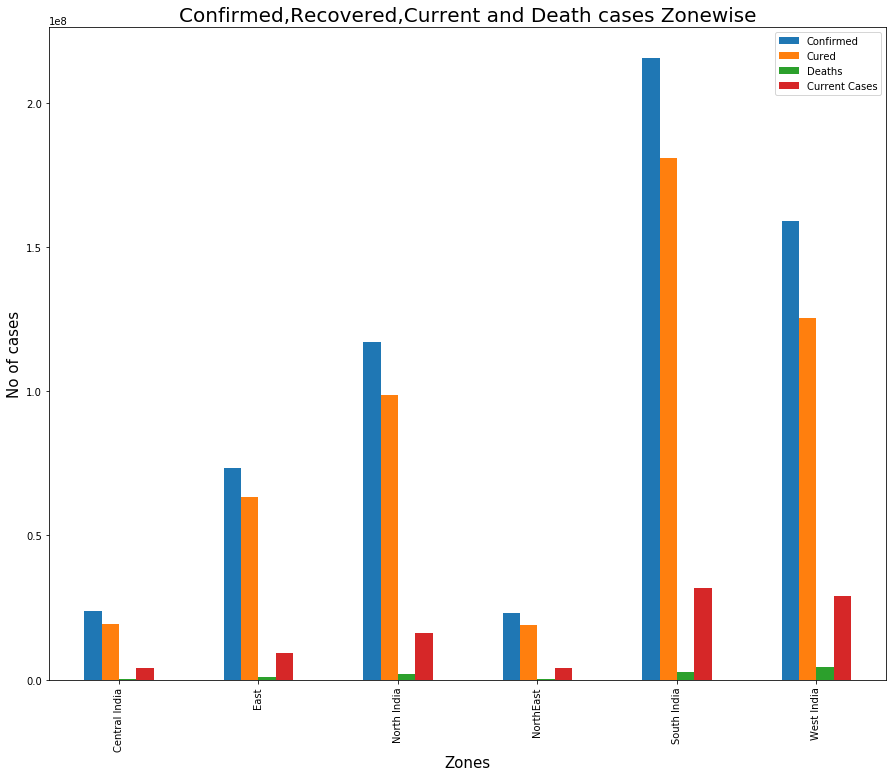

In [31]:

zone_grp[['Confirmed','Cured','Deaths','Current Cases']].plot(kind='bar',figsize=(15,12))
plt.xlabel('Zones',fontsize=15)
plt.ylabel('No of cases',fontsize=15)
plt.title('Confirmed,Recovered,Current and Death cases Zonewise',fontsize=20)

plt.show()

In [32]:
zone_grp

,Confirmed,Cured,Deaths,Current Cases
Zones,,,,
Central India,23640092.0,19129728.0,369693.0,4140671.0
East,73538810.0,63431553.0,794192.0,9313065.0
North India,116938172.0,98845860.0,2027484.0,16064828.0
NorthEast,23060826.0,18975178.0,107960.0,3977688.0
South India,215384443.0,180980351.0,2591921.0,31812171.0
West India,158858815.0,125216853.0,4557284.0,29084678.0


Text(0.5, 1.0, 'Confirmed,Recovered,Current and Death cases Zonewise')

<Figure size 432x288 with 0 Axes>

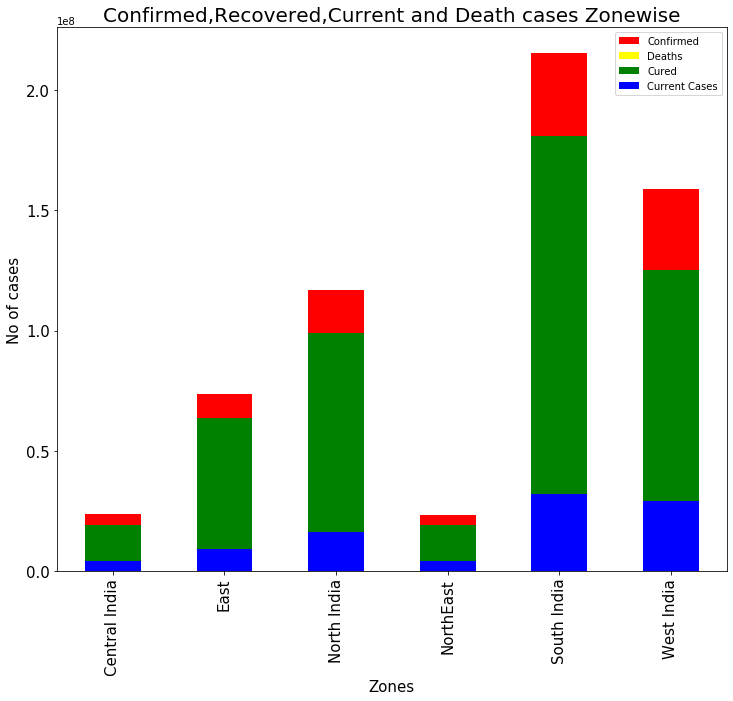

In [33]:

zone_grp=zone_grp.reset_index()
fig = plt.figure()
ax = fig.add_axes()
ax =zone_grp.plot(x="Zones", y="Confirmed", kind="bar",ax=ax,color='red',figsize=(12,10),fontsize=15,)
zone_grp.plot(x="Zones", y="Deaths", kind="bar", ax=ax, color="yellow")
zone_grp.plot(x="Zones", y="Cured", kind="bar", ax=ax, color="green")
zone_grp.plot(x="Zones", y="Current Cases", kind="bar", ax=ax, color="blue")
plt.xlabel('Zones',fontsize=15)
plt.ylabel('No of cases',fontsize=15)
plt.title('Confirmed,Recovered,Current and Death cases Zonewise',fontsize=20)

In [34]:
lastday=df.shape[0]-1

In [35]:
lastday

8422

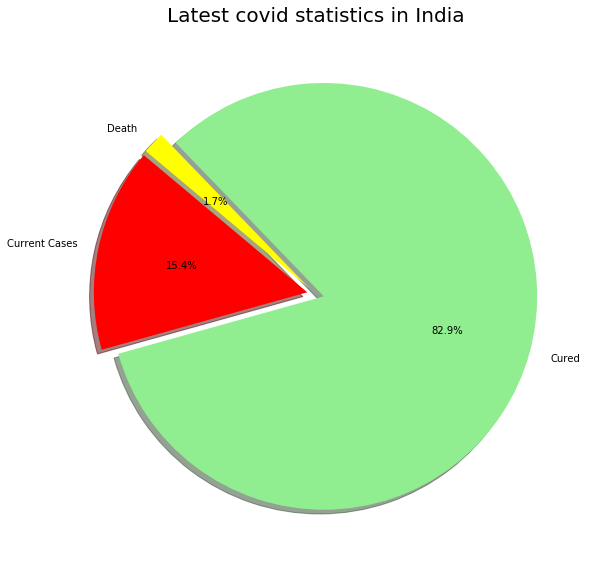

In [36]:


labels=['Current Cases','Cured','Death']
sizes=[Tot_Cases['Current Cases'].sum(),Tot_Cases['Cured'].sum(),Tot_Cases['Deaths'].sum()]
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels, explode=(0.04,0.04,0.04),colors=['red','lightgreen','yellow'],
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Latest covid statistics in India', size=20)
    

plt.tight_layout()
plt.show()

In [37]:

population.head()


,Sl.no,State/Union Territory,Population
0,1,Uttar Pradesh,237882725.0
1,2,Bihar,124799926.0
2,3,Maharashtra,123144223.0
3,4,West Bengal,99609303.0
4,5,Madhya Pradesh,85358965.0


In [38]:
corr1=pd.merge(Tot_Cases, population, on="State/Union Territory")
corr1.drop(['Sl.no'],axis=1,inplace=True)

In [39]:

corr1['Cases/10million'] = (corr1['Confirmed']/corr1['Population'])*10000000


In [40]:
corr1

,State/Union Territory,Confirmed,Cured,Deaths,Current Cases,mortality_rate,Population,Cases/10million
0,Andhra Pradesh,64911493.0,56536152.0,555228.0,7820113.0,0.01,53903393.0,1.204219e+07
1,Arunachal Pradesh,941675.0,734104.0,2086.0,205485.0,0.00,1570458.0,5.996181e+06
2,Assam,16820098.0,14137404.0,63130.0,2619564.0,0.00,35607039.0,4.723813e+06
3,Bihar,18536035.0,16487424.0,93293.0,1955318.0,0.01,124799926.0,1.485260e+06
4,Chandigarh,1009607.0,832863.0,14459.0,162285.0,0.01,1158473.0,8.714981e+06
5,Chhattisgarh,10718422.0,8308061.0,105254.0,2305107.0,0.01,29436231.0,3.641235e+06
6,Delhi,33756114.0,29065906.0,728047.0,3962161.0,0.02,18710922.0,1.804086e+07
7,Goa,3155891.0,2668588.0,39470.0,447833.0,0.01,1586250.0,1.989529e+07
8,Gujarat,16070316.0,13271667.0,484191.0,2314458.0,0.03,63872399.0,2.516003e+06
9,Haryana,12841932.0,11049446.0,141100.0,1651386.0,0.01,28204692.0,4.553119e+06


In [41]:
corr1.corr()

,Confirmed,Cured,Deaths,Current Cases,mortality_rate,Population,Cases/10million
Confirmed,1.000000,0.998293,0.926709,0.971752,0.436018,0.557117,0.245925
Cured,0.998293,1.000000,0.908941,0.956481,0.435586,0.564878,0.249208
Deaths,0.926709,0.908941,1.000000,0.955624,0.544390,0.459944,0.229076
Current Cases,0.971752,0.956481,0.955624,1.000000,0.401598,0.508830,0.221452
mortality_rate,0.436018,0.435586,0.544390,0.401598,1.000000,0.421843,0.149492
Population,0.557117,0.564878,0.459944,0.508830,0.421843,1.000000,-0.245079
Cases/10million,0.245925,0.249208,0.229076,0.221452,0.149492,-0.245079,1.000000


(7.0, 0.0)

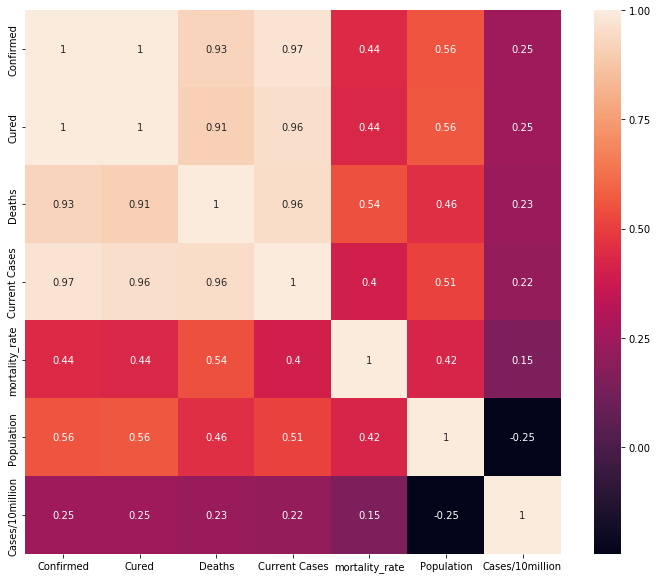

In [42]:
plt.figure(figsize = (12,10))
plt.yticks(rotation=180, va="center")
ax=sns.heatmap(corr1.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [43]:
 df_date=df.groupby('Date')['Date','Confirmed'].sum()

In [44]:
df_date

,Confirmed
Date,
2020-01-30,1.0
2020-01-31,1.0
2020-02-01,2.0
2020-02-02,3.0
2020-02-03,3.0
...,...
2020-11-12,8683916.0
2020-11-13,8728795.0
2020-11-14,8773479.0


### Time series Forecasting

In [45]:
#Group by date and find total confirmed cases from all states in a day
df_date['Daily_confirmed'] = df_date['Confirmed'].diff().fillna(df_date['Confirmed'])


In [46]:

df_date['Daily_confirmed'] = df_date['Daily_confirmed'].astype(float)

df_date.tail(25)

,Confirmed,Daily_confirmed
Date,,
2020-10-23,7761312.0,54366.0
2020-10-24,7814682.0,53370.0
2020-10-25,7864811.0,50129.0
2020-10-26,7909959.0,45148.0
2020-10-27,7946429.0,36470.0
2020-10-28,7990322.0,43893.0
2020-10-29,8040203.0,49881.0
2020-10-30,8088851.0,48648.0
2020-10-31,8137119.0,48268.0


In [47]:
df_date=df_date.drop('Confirmed',axis=1)

#### Plotting current data


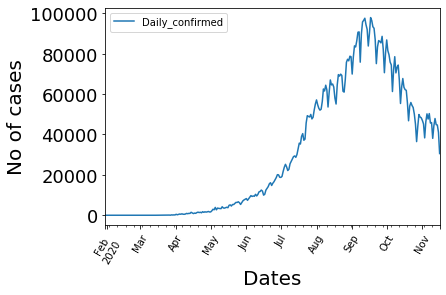

In [48]:
#plotting current data

df_date.plot()
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel("Dates",fontsize=20)
plt.ylabel("No of cases",fontsize=20)
plt.xticks(rotation=60,fontsize=10)

plt.show()

In [49]:
from pmdarima import auto_arima

import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt


### Seasonality Checking

<Figure size 432x288 with 0 Axes>

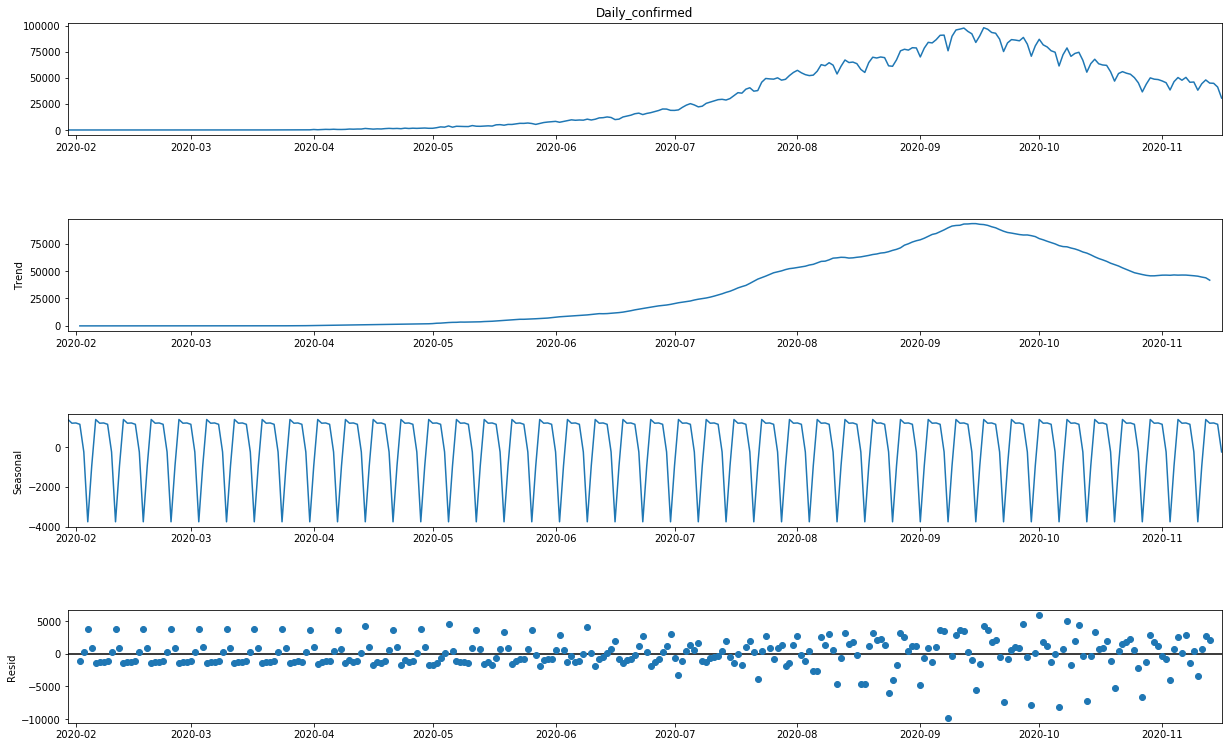

In [51]:
#Decomposing data to observe if there exists a sesional trend

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_date['Daily_confirmed'], model='additive')

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 12)

In [52]:
from statsmodels.tsa.stattools import adfuller #adfuller stands for Augmented Dickey-Fuller unit root test.

#The function find mean and standard deviation of the series and and performs augmented dickey fuller test.
#returns pvale .. The samaller the pvalue more stationary is the series.

def test_stationarity(timeseries, window = 15, cutoff = 0.01):
  rolmean = timeseries.rolling(window).mean()
  rolstd = timeseries.rolling(window).std()
  fig = plt.figure(figsize=(12, 8))
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC',)
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  pvalue = dftest[1]
  if pvalue < cutoff:
      print('p-value = %.4f. The series is likely stationary.' % pvalue)
  else:
      print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
  
  print(dfoutput)

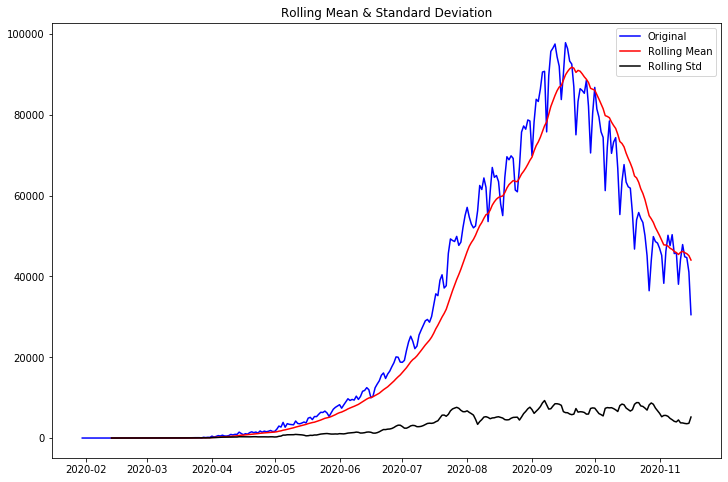

Results of Dickey-Fuller Test:
p-value = 0.4205. The series is likely non-stationary.
Test Statistic                  -1.720720
p-value                          0.420470
#Lags Used                      15.000000
Number of Observations Used    276.000000
Critical Value (1%)             -3.454267
Critical Value (5%)             -2.872070
Critical Value (10%)            -2.572381
dtype: float64


In [53]:
test_stationarity(df_date['Daily_confirmed'])


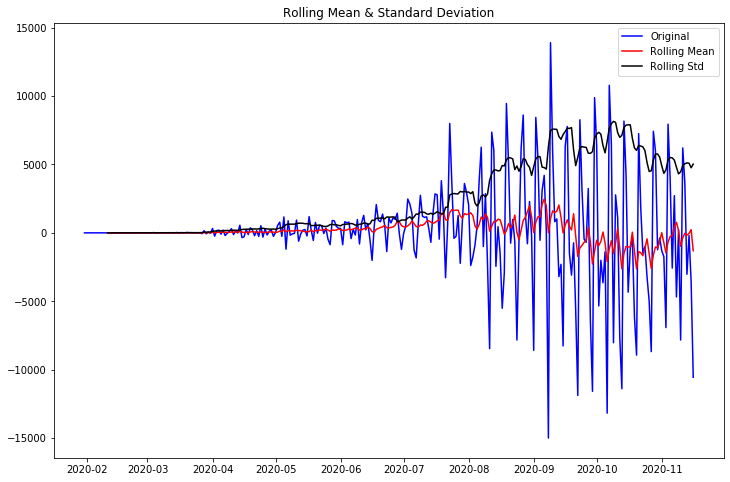

Results of Dickey-Fuller Test:
p-value = 0.3630. The series is likely non-stationary.
Test Statistic                  -1.835498
p-value                          0.362986
#Lags Used                      16.000000
Number of Observations Used    274.000000
Critical Value (1%)             -3.454444
Critical Value (5%)             -2.872147
Critical Value (10%)            -2.572422
dtype: float64


In [54]:

first_diff = df_date.Daily_confirmed - df_date.Daily_confirmed.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)


C:\Users\anjit\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


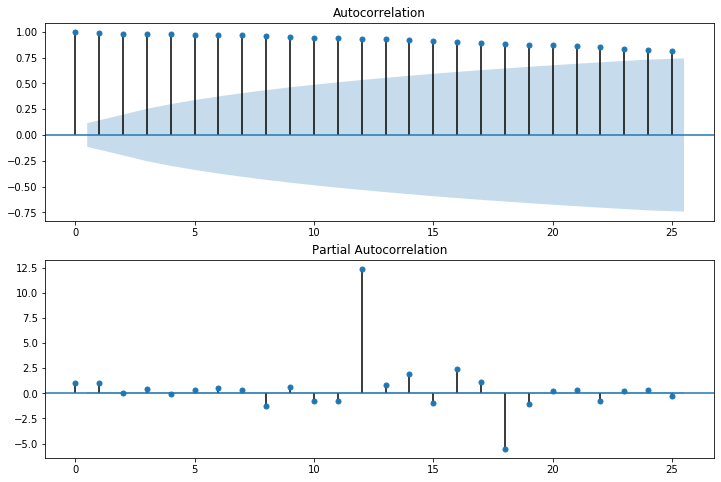

In [55]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_date.Daily_confirmed, ax=ax1, ) # using default value of lag
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_date.Daily_confirmed, ax=ax2) # using default value of lag


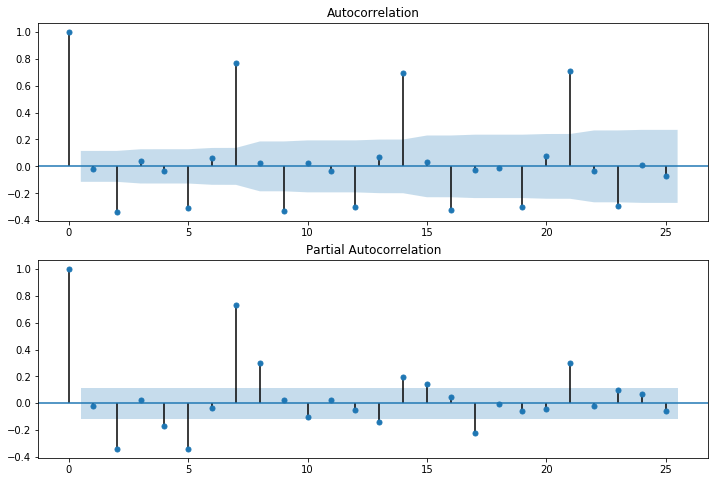

In [56]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, ax=ax2)

In [57]:
# we can see a recurring correlation exists in both ACF and PACF hece we should choose SARIMAX model which also deals with seasonality

sarimax_mod = sm.tsa.statespace.SARIMAX(df_date.Daily_confirmed, trend='n', order=(14,1,0)).fit()
print(sarimax_mod.summary())

C:\Users\anjit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\anjit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:        Daily_confirmed   No. Observations:                  292
Model:              SARIMAX(14, 1, 0)   Log Likelihood               -2622.738
Date:                Thu, 11 Feb 2021   AIC                           5275.477
Time:                        14:05:05   BIC                           5330.576
Sample:                    01-30-2020   HQIC                          5297.550
                         - 11-16-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2648      0.045     -5.841      0.000      -0.354      -0.176
ar.L2         -0.1909      0.049     -3.911      0.000      -0.287      -0.095
ar.L3          0.0564      0.052      1.075      0.2

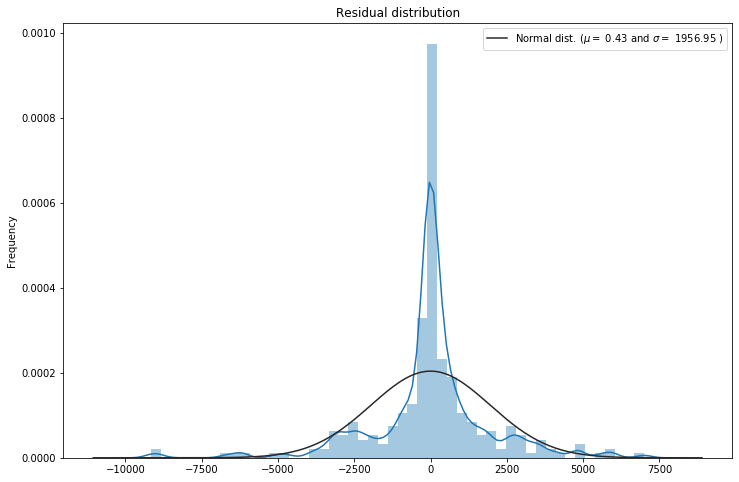

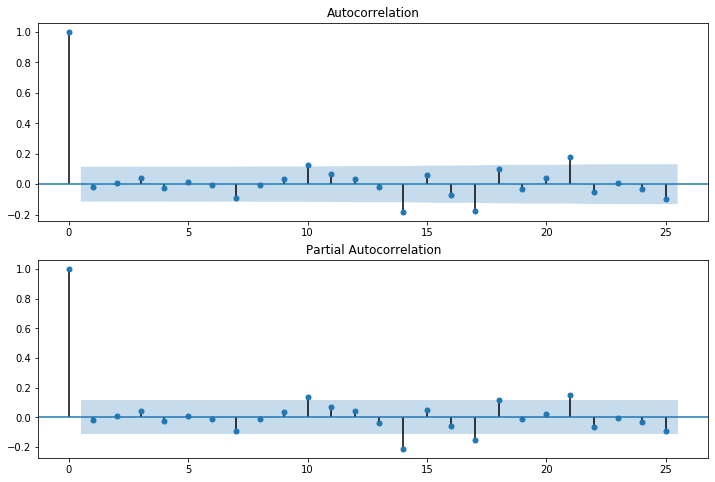

In [58]:
import scipy.stats as stats

resid = sarimax_mod.resid #gives residual degree of freedom (mu, sigma, pvalue ... )
#print(NormaltestResult(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimax_mod.resid, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimax_mod.resid, ax=ax2)

### Prediction using Sarimax

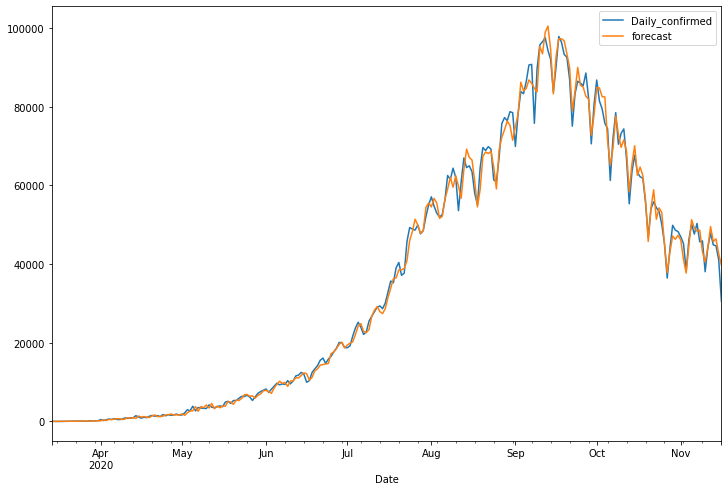

In [59]:

start_index = '14-Mar-20'
end_index = '16-Dec-20'

#adding forecasted values and plotting
df_date['forecast'] = sarimax_mod.predict(start= start_index,end = end_index,dynamic= False,)  

df_date[start_index:][['Daily_confirmed', 'forecast']].plot(figsize=(12, 8))

In [60]:
import datetime
from datetime import timedelta

In [61]:
future_predict = sarimax_mod.predict(start= '17-Nov-20' ,end = '31-Dec-20' ,dynamic= True,)


### Forecasting future confirmed cases

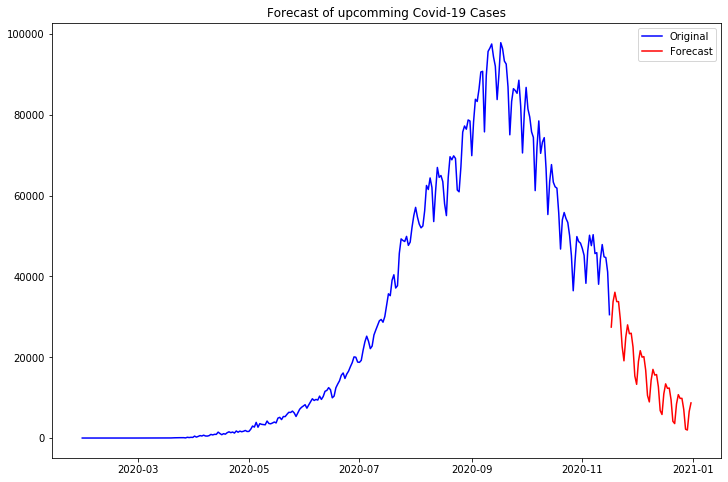

In [62]:
figg = plt.figure(figsize=(12, 8))
orig = plt.plot(df_date['Daily_confirmed'], color='blue',label='Original')
fore = plt.plot(future_predict, color='red', label='Forecast')
plt.legend(loc='best')
plt.title('Forecast of upcomming Covid-19 Cases')
plt.show()

In [63]:
future_predict

2020-11-17    27473.623428
2020-11-18    33763.706222
2020-11-19    36098.515599
2020-11-20    33783.458408
2020-11-21    33776.811408
2020-11-22    29357.983277
2020-11-23    22654.142245
2020-11-24    19117.633674
2020-11-25    24949.774319
2020-11-26    28024.989450
2020-11-27    25829.482933
2020-11-28    25956.703299
2020-11-29    22544.198453
2020-11-30    15364.492215
2020-12-01    13293.729379
2020-12-02    18958.977371
2020-12-03    21630.015802
2020-12-04    20032.396488
2020-12-05    20153.351716
2020-12-06    16788.907732
2020-12-07    10545.224149
2020-12-08     8941.357437
2020-12-09    14310.663007
2020-12-10    16999.765171
2020-12-11    15592.969234
2020-12-12    15713.493792
2020-12-13    12674.815592
2020-12-14     6800.243037
2020-12-15     5828.294807
2020-12-16    10948.790692
2020-12-17    13414.099473
2020-12-18    12304.320389
2020-12-19    12378.925594
2020-12-20     9479.695867
2020-12-21     4140.275302
2020-12-22     3575.333982
2020-12-23     8426.083116
2